In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math

pd.options.mode.chained_assignment = None
%matplotlib inline

## Real estate prices in NYC

All real estate sales accross NYC could be found on

https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

Consider data for Staten Island and ask a question: 
### **which characteristic of the house would be the best predictor for its price?**

In [2]:
REStaten=pd.read_csv('data/rollingsales_statenisland.csv')

In [3]:
REStaten.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,65,,A3,22 BLUE HERON DRIVE,,...,1,0,1,8000,3000,1987,1,A3,1185000,3/19/18
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,19,,A1,4 EDWIN STREET,,...,1,0,1,7258,2230,1980,1,A1,866000,8/3/17
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5406,26,,A2,87 ELMBANK STREET,,...,1,0,1,5000,912,1950,1,A2,530000,4/27/18
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,10,,A2,112 ELMBANK STREET,,...,1,0,1,6242,1768,1975,1,A2,735000,11/7/17
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,15,,A5,95 EAGAN AVENUE,,...,1,0,1,1546,1579,1986,1,A5,475000,9/7/17


In [4]:
REStaten.columns

Index([u'BOROUGH', u'NEIGHBORHOOD', u'BUILDING_CLASS_CATEGORY',
       u'TAX_CLASS_AT_PRESENT', u'BLOCK', u'LOT', u'EASE-MENT',
       u'BUILDING_CLASS_AT_PRESENT', u'ADDRESS', u'APARTMENT_NUMBER',
       u'ZIP_CODE', u'RESIDENTIAL_UNITS', u'COMMERCIAL_UNITS', u'TOTAL_UNITS',
       u'LAND_SQUARE_FEET', u'GROSS_SQUARE_FEET', u'YEAR_BUILT',
       u'TAX_CLASS_AT_TIME_OF_SALE', u'BUILDING_CLASS_AT_TIME_OF_SALE',
       u'SALE_PRICE', u'SALE_DATE'],
      dtype='object')

In [5]:
REStaten.describe()

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,8706.0,8706.000000,8706.000000,8706.000000,8706.000000,8706.000000,8706.000000,8.706000e+03,8706.000000,8706.000000,8706.000000,8.706000e+03
mean,5.0,3319.292212,208.871468,10132.832989,1.257179,0.062486,1.324144,5.016016e+03,1689.650930,1884.641282,1.171721,3.918813e+05
std,0.0,2344.202564,453.187678,1332.608872,1.579128,0.722336,1.718008,3.779630e+04,5804.911675,400.438263,0.601193,8.260853e+05
min,5.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00
25%,5.0,1116.000000,25.000000,10305.000000,1.000000,0.000000,1.000000,2.000000e+03,960.000000,1944.000000,1.000000,0.000000e+00
50%,5.0,3121.000000,56.000000,10308.000000,1.000000,0.000000,1.000000,3.125000e+03,1400.000000,1975.000000,1.000000,3.858250e+05
75%,5.0,5432.000000,135.000000,10312.000000,2.000000,0.000000,2.000000,4.520000e+03,1974.000000,1990.000000,1.000000,5.800000e+05
max,5.0,8050.000000,5359.000000,10314.000000,84.000000,43.000000,84.000000,3.014056e+06,349503.000000,2018.000000,4.000000,4.725000e+07


In [6]:
#as we see sale price and house size could be as low as zero. Exclude missing/unrealistic values by defining a reliable data index
#also take only houses with residential units
ind=(REStaten.SALE_PRICE>50000)&(REStaten.GROSS_SQUARE_FEET>300)&(REStaten.LAND_SQUARE_FEET>300)&(REStaten.RESIDENTIAL_UNITS>0)
ind.head() #this is how ind would look like - a boolean series

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [7]:
#this is how many records we have left
sum(ind)

4866

In [8]:
#filter the data; loc accesses rows by boolean index (as opposed to integer positions done with iloc)
REStaten_=REStaten.loc[ind]

In [9]:
#now find the most expensive house

In [10]:
REStaten_.describe()

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,4866.0,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4.866000e+03
mean,5.0,3462.579326,79.148993,10307.940608,1.342376,0.018085,1.360460,3906.581176,1740.041102,1967.412043,1.020345,5.631876e+05
std,0.0,2390.676182,92.461180,4.088231,1.128679,0.200927,1.175613,3230.453434,1318.247231,31.816460,0.208250,3.802599e+05
min,5.0,13.000000,1.000000,10301.000000,1.000000,0.000000,1.000000,315.000000,330.000000,1859.000000,1.000000,5.070000e+04
25%,5.0,1093.250000,23.000000,10305.000000,1.000000,0.000000,1.000000,2300.000000,1216.000000,1945.000000,1.000000,4.050000e+05
50%,5.0,3373.500000,49.000000,10308.000000,1.000000,0.000000,1.000000,3325.000000,1512.000000,1975.000000,1.000000,5.335000e+05
75%,5.0,5523.000000,97.000000,10312.000000,2.000000,0.000000,2.000000,4536.000000,2050.000000,1993.000000,1.000000,6.557782e+05
max,5.0,8050.000000,926.000000,10314.000000,42.000000,7.000000,43.000000,63624.000000,58792.000000,2017.000000,4.000000,2.000000e+07


# Excercise 1. Repeat the in-class analysis for duplexes
Q1. Create the dataframe, containing only the duplexes (houses with two residential units)

In [11]:
sfind2=REStaten_.RESIDENTIAL_UNITS==2
REStaten_sf2=REStaten_.loc[sfind2]

Q2. What is the most expensive house among duplexes (two residential units)?

In [12]:
REStaten_sf2.loc[REStaten_sf2['SALE_PRICE'].idxmax()]

BOROUGH                                                                     5
NEIGHBORHOOD                                                      ELTINGVILLE
BUILDING_CLASS_CATEGORY           02 TWO FAMILY DWELLINGS                    
TAX_CLASS_AT_PRESENT                                                        1
BLOCK                                                                    5621
LOT                                                                        32
EASE-MENT                                                                    
BUILDING_CLASS_AT_PRESENT                                                  B9
ADDRESS                                                    671 ANNADALE ROAD 
APARTMENT_NUMBER                                                             
ZIP_CODE                                                                10312
RESIDENTIAL_UNITS                                                           2
COMMERCIAL_UNITS                                                

Q3. Build correlation matrix for YEAR_BUILT,GROSS_SQUARE_FEET, LAND_SQUARE_FEET, SALE_PRICE for duplexes houses.

In [13]:
REStaten_sf2[['YEAR_BUILT','GROSS_SQUARE_FEET','LAND_SQUARE_FEET','SALE_PRICE']].corr()

,YEAR_BUILT,GROSS_SQUARE_FEET,LAND_SQUARE_FEET,SALE_PRICE
YEAR_BUILT,1.000000,0.101403,-0.109146,0.318634
GROSS_SQUARE_FEET,0.101403,1.000000,0.411876,0.409971
LAND_SQUARE_FEET,-0.109146,0.411876,1.000000,0.358305
SALE_PRICE,0.318634,0.409971,0.358305,1.000000


Q4. Visualize sale_price against gross_square_feet as a scatter plot on regular scale, excluding the outliers (units above 10.000 sqft)

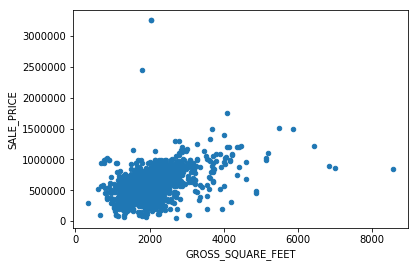

In [14]:
REStaten_sf2[REStaten_sf2['GROSS_SQUARE_FEET']<=10000].plot(kind='scatter',x='GROSS_SQUARE_FEET',y='SALE_PRICE')

Q5. Run a regression of duplex price against land area, no intercept

In [15]:
lm = smf.ols(formula='SALE_PRICE~LAND_SQUARE_FEET-1', data = REStaten_sf2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     4653.
Date:                Thu, 20 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:09:05   Log-Likelihood:                -18666.
No. Observations:                1324   AIC:                         3.733e+04
Df Residuals:                    1323   BIC:                         3.734e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
LAND_SQUARE_FEET   122.6652      1.798  

Q6. Now standardize the sale_price and gross_square_feet by subtracting averages and dividing by standard deviation for both:
$$
X^*:=(X-E[X])/\sigma(X)
$$
Repeat the regression for the standardized sale_price_stand vs gross_square_feet_stand. Compare the regression coefficient against the correlation between sale_price and gross_square_feet. Do you find smth interesting here?

In [16]:
sp_mean = REStaten_sf2['SALE_PRICE'].mean()
sp_sd = REStaten_sf2['SALE_PRICE'].std()
REStaten_sf2['SALE_PRICE_new'] = REStaten_sf2['SALE_PRICE'].map(lambda x:(x-sp_mean)/sp_sd)

In [17]:
gsf_mean = REStaten_sf2['GROSS_SQUARE_FEET'].mean()
gsf_sd = REStaten_sf2['GROSS_SQUARE_FEET'].std()
REStaten_sf2['GROSS_SQUARE_FEET_new'] = REStaten_sf2['GROSS_SQUARE_FEET'].map(lambda x:(x-gsf_mean)/gsf_sd)

In [18]:
lm = smf.ols(formula='SALE_PRICE_new~GROSS_SQUARE_FEET_new-1', data = REStaten_sf2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         SALE_PRICE_new   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     267.3
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           7.28e-55
Time:                        18:09:23   Log-Likelihood:                -1756.4
No. Observations:                1324   AIC:                             3515.
Df Residuals:                    1323   BIC:                             3520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
GROSS_SQUARE_FEET_new     0.41

## Exercise 2. Countries of the world: population density

Run a uni-variate linear regression
$$
Population=w\cdot Area
$$
to find the coefficient $w$ representing average population density. 

In [19]:
#read the data
data1=pd.read_csv("data/countries.csv",index_col=0)

In [20]:
data1.head()

,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


Some exploratory analysis

In [21]:
data1.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [22]:
#Total population of all 227 countries:
print data1.Population.sum()

6524044551


In [23]:
#Total area of all 227 countries:
print data1.Area_sqmi.sum()

135797519


In [24]:
#Avg gdp percapita 227 countries:
print data1.GDP_percapita.mean()

9689.82300885


Q1. Find top countries by area, density and GDP

Find the top county by population, area, density, GDP per capita

In [26]:
data1.loc[data1.Population.idxmax()]

Region                     ASIA (EX. NEAR EAST)         
Population                                    1313973713
Area_sqmi                                        9596960
Pop_Density                                        136.9
Coastline_area_ratio                                0.15
Net_migration                                       -0.4
InfantMortality_per1000                            24.18
GDP_percapita                                       5000
Literacy_percent                                    90.9
Phones_per_1000                                    266.7
Arable                                              15.4
Crops                                               1.25
Other                                              83.35
Climate                                              1.5
Birthrate                                          13.25
Deathrate                                           6.97
Agriculture                                        0.125
Industry                       

In [27]:
data1.loc[data1.Area_sqmi.idxmax()]

Region                     C.W. OF IND. STATES 
Population                            142893540
Area_sqmi                              17075200
Pop_Density                                 8.4
Coastline_area_ratio                       0.22
Net_migration                              1.02
InfantMortality_per1000                   15.39
GDP_percapita                              8900
Literacy_percent                           99.6
Phones_per_1000                           280.6
Arable                                     7.33
Crops                                      0.11
Other                                     92.56
Climate                                     NaN
Birthrate                                  9.95
Deathrate                                 14.65
Agriculture                               0.054
Industry                                  0.371
Service                                   0.575
Name: Russia , dtype: object

In [28]:
data1.loc[data1.Pop_Density.idxmax()]

Region                     WESTERN EUROPE                     
Population                                               32543
Area_sqmi                                                    2
Pop_Density                                            16271.5
Coastline_area_ratio                                       205
Net_migration                                             7.75
InfantMortality_per1000                                   5.43
GDP_percapita                                            27000
Literacy_percent                                            99
Phones_per_1000                                         1035.6
Arable                                                       0
Crops                                                        0
Other                                                      100
Climate                                                    NaN
Birthrate                                                 9.19
Deathrate                                              

In [29]:
data1.loc[data1.GDP_percapita.idxmax()]

Region                     WESTERN EUROPE                     
Population                                              474413
Area_sqmi                                                 2586
Pop_Density                                              183.5
Coastline_area_ratio                                         0
Net_migration                                             8.97
InfantMortality_per1000                                   4.81
GDP_percapita                                            55100
Literacy_percent                                           100
Phones_per_1000                                          515.4
Arable                                                   23.28
Crops                                                      0.4
Other                                                    76.32
Climate                                                    NaN
Birthrate                                                11.94
Deathrate                                              

Q2. Plot population vs area, log-scale

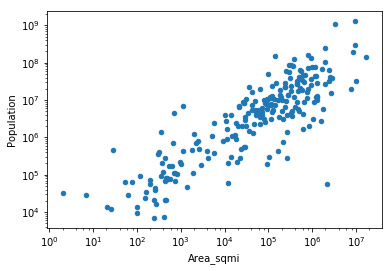

In [30]:
data1.plot(y='Population',x='Area_sqmi',kind='scatter',logx=True,logy=True)

Q3. Find the average density by performing a regression of population vs area without an intercept

In [31]:
lm = smf.ols(formula='Population~Area_sqmi-1', data = data1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     78.73
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           2.21e-16
Time:                        18:11:12   Log-Likelihood:                -4513.1
No. Observations:                 227   AIC:                             9028.
Df Residuals:                     226   BIC:                             9032.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Area_sqmi     32.6726      3.682      8.873      0.0

Q4. Plot the fitted regression line on original data points

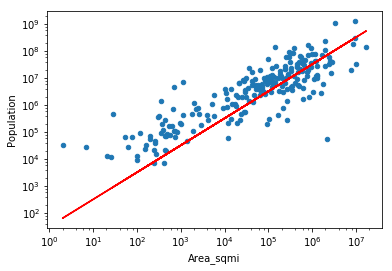

In [32]:
data1['Density'] = lm.predict()
data1.plot(y='Population',x='Area_sqmi',kind='scatter',logx=True,logy=True)
plt.plot(data1.Area_sqmi,data1.Density,'r-')